In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1SdJI9h4OxKGRFEfm3JOYIkiWMyBqFmw4'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [ ]:
path_to_zip_file = "./dataset.zip"
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

The dataset.zip has been extracted to the dataset directory

In [ ]:
import pandas as pd
import json

df = pd.read_csv("dataset/full_dataset.csv")

In [ ]:
df.head(100)

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
...,...,...,...,...,...,...,...
95,95,Baked Beans,"[""3 (1 lb.) cans pork and beans"", ""1/2 c. bell...","[""Cook onions and bell pepper in oil until oni...",www.cookbooks.com/Recipe-Details.aspx?id=775763,Gathered,"[""pork"", ""bell pepper"", ""onions"", ""catsup"", ""b..."
96,96,Sweet-N-Sour Chicken,"[""2 c. diced cooked chicken"", ""2 Tbsp. shorten...","[""Saute onion in 2 tablespoons shortening."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=228506,Gathered,"[""chicken"", ""shortening"", ""onion"", ""carrot chu..."
97,97,Ambrosia,"[""8 to 10 juicy oranges, peeled and diced"", ""1...","[""Combine all ingredients. Chill overnight."", ...",www.cookbooks.com/Recipe-Details.aspx?id=342478,Gathered,"[""oranges"", ""moist coconut"", ""pecans"", ""cherri..."
98,98,Crazy Peanut Butter Cookies,"[""1 c. creamy peanut butter"", ""1 c. sugar"", ""1...","[""Mix together and roll into balls; flatten wi...",www.cookbooks.com/Recipe-Details.aspx?id=892363,Gathered,"[""peanut butter"", ""sugar"", ""egg""]"


In [ ]:
df = df.rename(columns={'Unnamed: 0': 'Id'})

The dataset contains 7 columns:

In [ ]:
list(df.columns)

['Id', 'title', 'ingredients', 'directions', 'link', 'source', 'NER']

The column title does not contain unique values

In [ ]:
print("unique titles#: " + str(df["title"].nunique()) + ", all titles#: " + str(len(df["title"])))

unique titles#: 1312871, all titles#: 2231142


In [ ]:
def print_duplicates(columns):
    return {k: v for k, v in sorted({elem[0]: len(elem[1]) for elem in df.groupby(columns) if len(elem[1]) > 1}.items(), key=lambda item: item[1], reverse=True)}

There are multiple duplicated title rows.

We need to check for duplicates at the title, ingredients and directions levels simultaneously

In [ ]:
list(print_duplicates(['title', 'ingredients','directions']).items())[:10]


[]

There are no duplicated rows containing 'title', 'ingredients','directions'.

Now we check if there are duplicated rows containing 'ingredients','directions' (first 10 duplicated rows):

In [ ]:
list(print_duplicates(['ingredients','directions']).items())[:10]

[]

Now we check if there are duplicated rows containing 'title','directions' (first 10 duplicated rows):

In [ ]:
list(print_duplicates(['title','directions']).items())[:10]

[(('Fruit Salad', '["Mix together and chill."]'), 13),
 (('Punch', '["Mix all ingredients together."]'), 11),
 (('Watergate Salad', '["Mix all ingredients and refrigerate."]'), 10),
 (('Watergate Salad', '["Mix all ingredients together and chill."]'), 9),
 (('Fruit Salad', '["Mix all together and chill."]'), 8),
 (('Barbecue Sauce', '["Mix all ingredients together."]'), 7),
 (('Broccoli Salad', '["Mix all ingredients together."]'), 7),
 (('Fruit Salad', '["Mix all ingredients together."]'), 7),
 (('Pistachio Salad', '["Mix together and chill."]'), 7),
 (('Vegetable Dip', '["Mix all ingredients together."]'), 7)]

Now we check if there are duplicated rows containing 'title', 'ingredients' (first 10 duplicated rows):

In [ ]:
list(print_duplicates(['title', 'ingredients']).items())[:10]

[(('Simple Syrup', '["1 cup sugar", "1 cup water"]'), 10),
 (('Simple Syrup', '["1 cup water", "1 cup sugar"]'), 5),
 (('Banana Split Cake',
   '["2 c. graham cracker crumbs", "1 stick margarine, melted"]'),
  4),
 (('Pumpkin Roll',
   '["3 eggs", "1 c. sugar", "2/3 c. pumpkin", "1 tsp. baking soda", "1/2 tsp. cinnamon", "3/4 c. flour"]'),
  4),
 (('Pumpkin Roll',
   '["3 eggs", "1 c. sugar", "2/3 c. pumpkin", "1 tsp. lemon juice", "3/4 c. flour", "1 tsp. baking powder", "2 tsp. cinnamon", "1 tsp. ginger", "1/2 tsp. nutmeg", "1/2 tsp. salt"]'),
  4),
 (('Simple Syrup', '["1 cup sugar", "1/2 cup water"]'), 4),
 (('Simple Syrup', '["3 cups sugar", "3 cups water"]'), 4),
 (('Banana Bars',
   '["1/2 c. butter", "1 1/2 c. sugar", "2 eggs", "3/4 c. buttermilk", "2 large ripe bananas", "2 c. flour", "1/2 tsp. salt", "1 tsp. baking soda", "1 tsp. vanilla"]'),
  3),
 (('Bread Pudding',
   '["1 loaf French bread", "1 qt. milk", "3 eggs", "2 c. sugar", "2 Tbsp. vanilla", "3 Tbsp. oleo", "1 c. rai

Now we check sample of duplicated rows containing 'title' (first 10 duplicated rows):

In [ ]:
list(print_duplicates(['title']).items())[:10]

[('Chicken Casserole', 4099),
 ('Broccoli Casserole', 3985),
 ('Squash Casserole', 2508),
 ('Cheese Ball', 2426),
 ('Zucchini Bread', 2298),
 ('Pecan Pie', 2285),
 ('Banana Bread', 2085),
 ('Meat Loaf', 1769),
 ('Pumpkin Bread', 1729),
 ('Corn Casserole', 1726)]

Now we check if there are duplicated rows containing 'ingredients' (first 10 duplicated rows):

In [ ]:
list(print_duplicates(['ingredients']).items())[:10]

[('["1 c. peanut butter", "1 c. sugar", "1 egg"]', 28),
 ('["1 c. peanut butter", "1 c. sugar", "1 egg", "1 tsp. vanilla"]', 22),
 ('["Ingredients:"]', 21),
 ('["1 box yellow cake mix"]', 18),
 ('["1 cup sugar", "1 cup water"]', 15),
 ('["1 c. sugar", "1 c. peanut butter", "1 egg"]', 13),
 ('["1 c. peanut butter", "1 egg", "1 c. sugar"]', 11),
 ('["1 c. salt", "2 c. flour", "1 c. water"]', 11),
 ('["1 c. mayonnaise", "1/2 c. sugar", "1/4 c. vinegar"]', 10),
 ('["1 c. self-rising flour", "1/2 c. milk", "2 Tbsp. mayonnaise"]', 10)]

Now we check if there are duplicated rows containing 'directions' (first 10 duplicated rows):

In [ ]:
list(print_duplicates(['directions']).items())[:10]


[('["Mix all ingredients together."]', 274),
 ('["Put ingredients into bread machine and press \\"Start\\"."]', 234),
 ('["Mix together and chill."]', 182),
 ('["Mix all ingredients together and chill."]', 162),
 ('["Preheat oven to 350 degrees."]', 156),
 ('["Mix all together and chill."]', 127),
 ('["Mix all ingredients and chill."]', 120),
 ('["Combine ingredients."]', 116),
 ('["Ice // rocks"]', 104),
 ('["Preheat oven to 350\\u00b0."]', 96)]

In [ ]:
json.loads(df.head()["ingredients"].tolist()[0])

['1 c. firmly packed brown sugar',
 '1/2 c. evaporated milk',
 '1/2 tsp. vanilla',
 '1/2 c. broken nuts (pecans)',
 '2 Tbsp. butter or margarine',
 '3 1/2 c. bite size shredded rice biscuits']

In [ ]:
json.loads(df.head()["directions"].tolist()[0])

['In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.',
 'Stir over medium heat until mixture bubbles all over top.',
 'Boil and stir 5 minutes more. Take off heat.',
 'Stir in vanilla and cereal; mix well.',
 'Using 2 teaspoons, drop and shape into 30 clusters on wax paper.',
 'Let stand until firm, about 30 minutes.']

In [ ]:
json.loads(df.head()["NER"].tolist()[0])

['brown sugar',
 'milk',
 'vanilla',
 'nuts',
 'butter',
 'bite size shredded rice biscuits']

In [ ]:
df[~df["link"].str.contains("www.cookbooks.com")]

,Id,title,ingredients,directions,link,source,NER
896341,896341,Deconstructed Screwdriver (The Raw Egg),"[""1/4 cup orange juice, or as desired"", ""2 (1....","[""Fill a food-safe silicon-based round ice mol...",www.allrecipes.com/recipe/241895/deconstructed...,Gathered,"[""orange juice"", ""jiggers vodka""]"
896342,896342,Kettle Corn,"[""1/4 cup vegetable oil"", ""1/4 cup white sugar...","[""Heat the vegetable oil in a large pot over m...",www.allrecipes.com/recipe/20808/kettle-corn/,Gathered,"[""vegetable oil"", ""white sugar"", ""popcorn kern..."
896343,896343,Pop'S Fabulous Ajvar,"[""2 1/2 pounds firm, shiny eggplants"", ""3 larg...","[""Preheat oven to 350 degrees F (175 degrees C...",www.allrecipes.com/recipe/238733/pops-fabulous...,Gathered,"[""eggplants"", ""green bell peppers"", ""red bell ..."
896344,896344,Chipotle-Mango Guacamole,"[""4 avocados, mashed"", ""2 Roma (plum) tomatoes...","[""Stir avocados, tomatoes, mango, cilantro, re...",www.allrecipes.com/recipe/241254/chipotle-mang...,Gathered,"[""avocados"", ""tomatoes"", ""mango"", ""cilantro"", ..."
896345,896345,Basic Homemade Ricotta Cheese,"[""7 cups whole milk"", ""1/2 cup heavy whipping ...","[""Place milk, cream, and vinegar in a saucepan...",www.allrecipes.com/recipe/261696/basic-homemad...,Gathered,"[""milk"", ""heavy whipping cream"", ""white vinega..."
...,...,...,...,...,...,...,...
2231137,2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."


In [ ]:
df["ingredients"].apply(json.loads).apply(len).describe()

count    2.231142e+06
mean     8.727042e+00
std      4.024347e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      4.070000e+02
Name: ingredients, dtype: float64

In [ ]:
df["ingredients_len"] = df["ingredients"].apply(json.loads).apply(len)

Below there is a histogram showing number of elements in the 'ingredients' column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


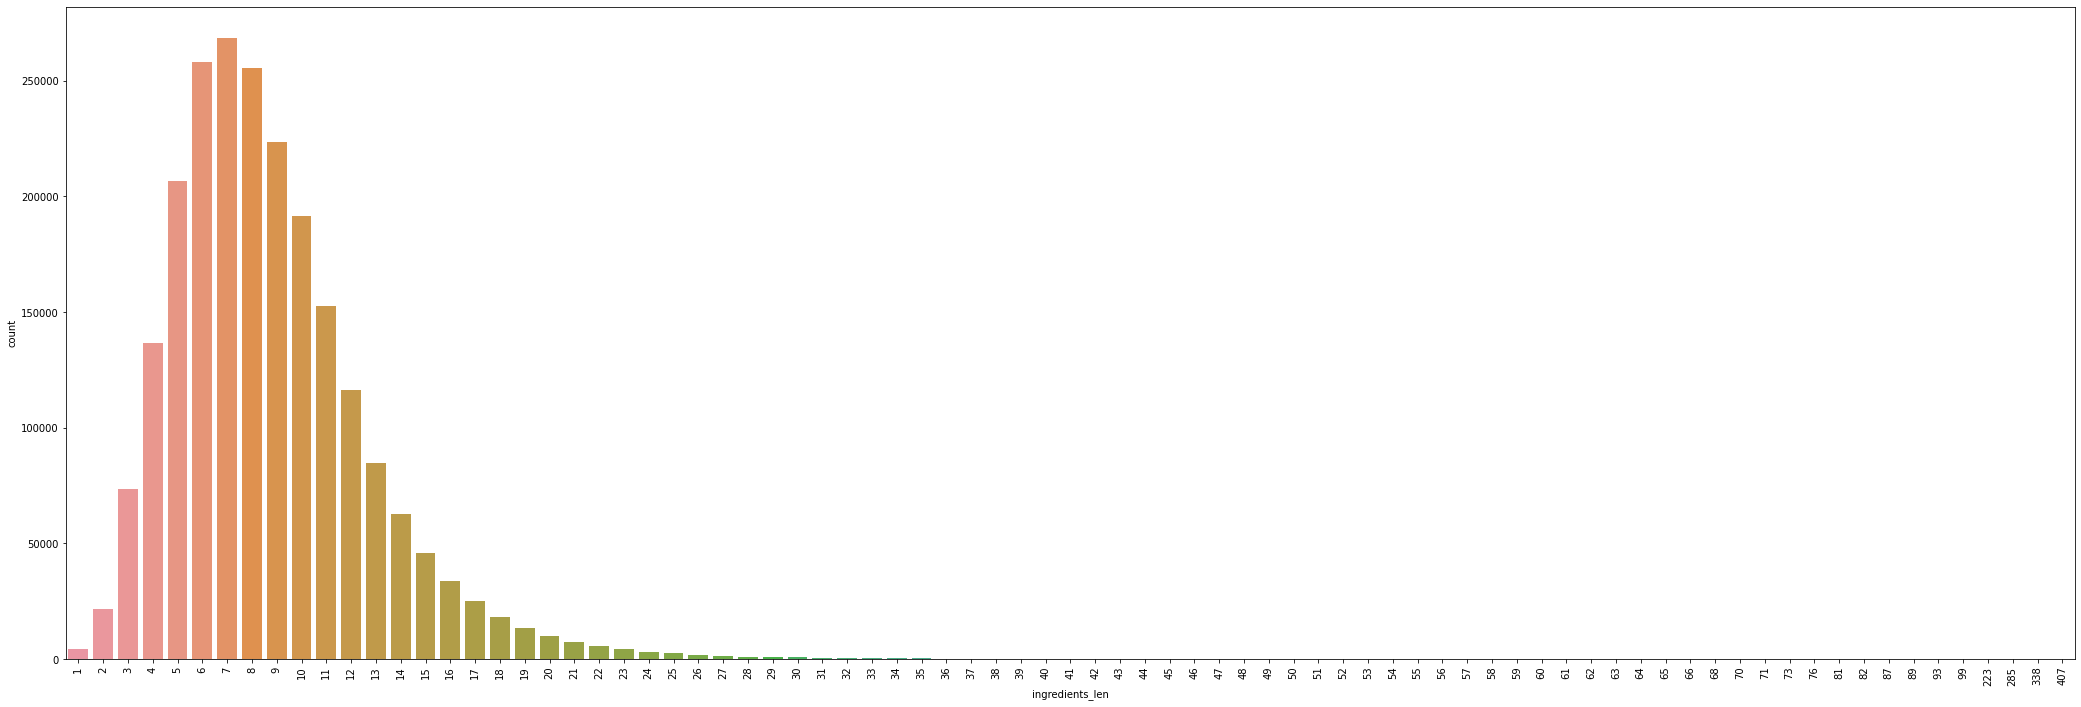

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y = df["ingredients_len"]
plt.figure(figsize=(18*2, 12))
g = sns.countplot(y)
# g = sns.histplot(y, bins=100)
g.set(yscale="linear")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["directions"].apply(json.loads).apply(len).describe()

count    2.231142e+06
mean     6.613628e+00
std      5.323238e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      1.640000e+02
Name: directions, dtype: float64

Below there is a histogram showing number of elements in the 'directions' column

In [ ]:
df["directions_len"] = df["directions"].apply(json.loads).apply(len)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


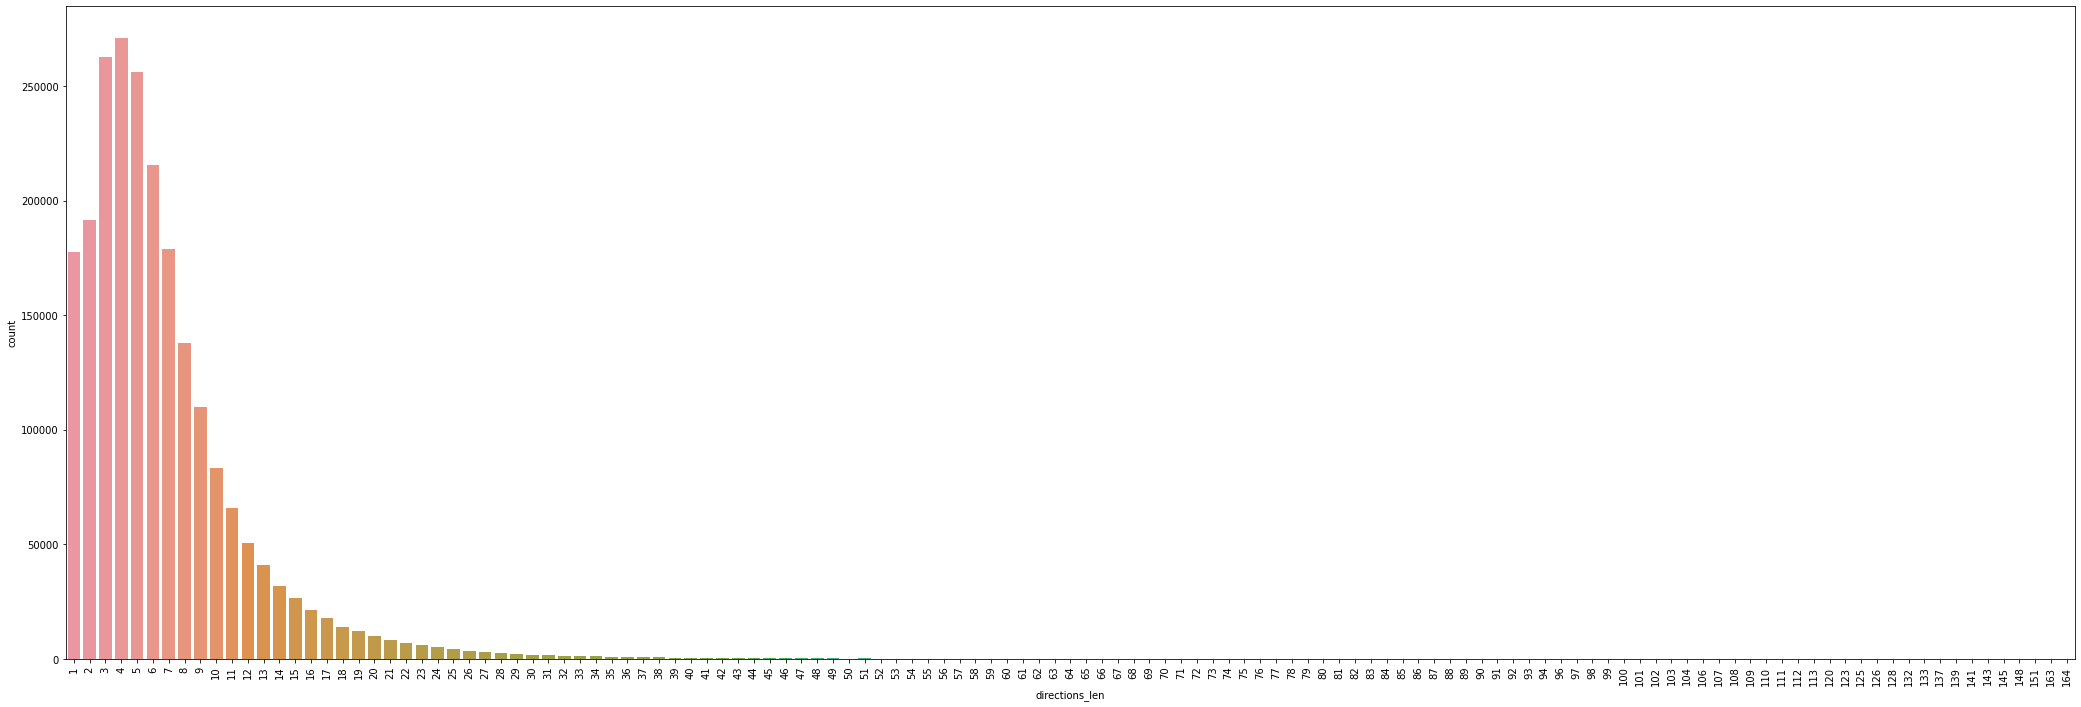

In [ ]:
y = df["directions_len"]
plt.figure(figsize=(18*2, 12))
g = sns.countplot(y)
g.set(yscale="linear")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


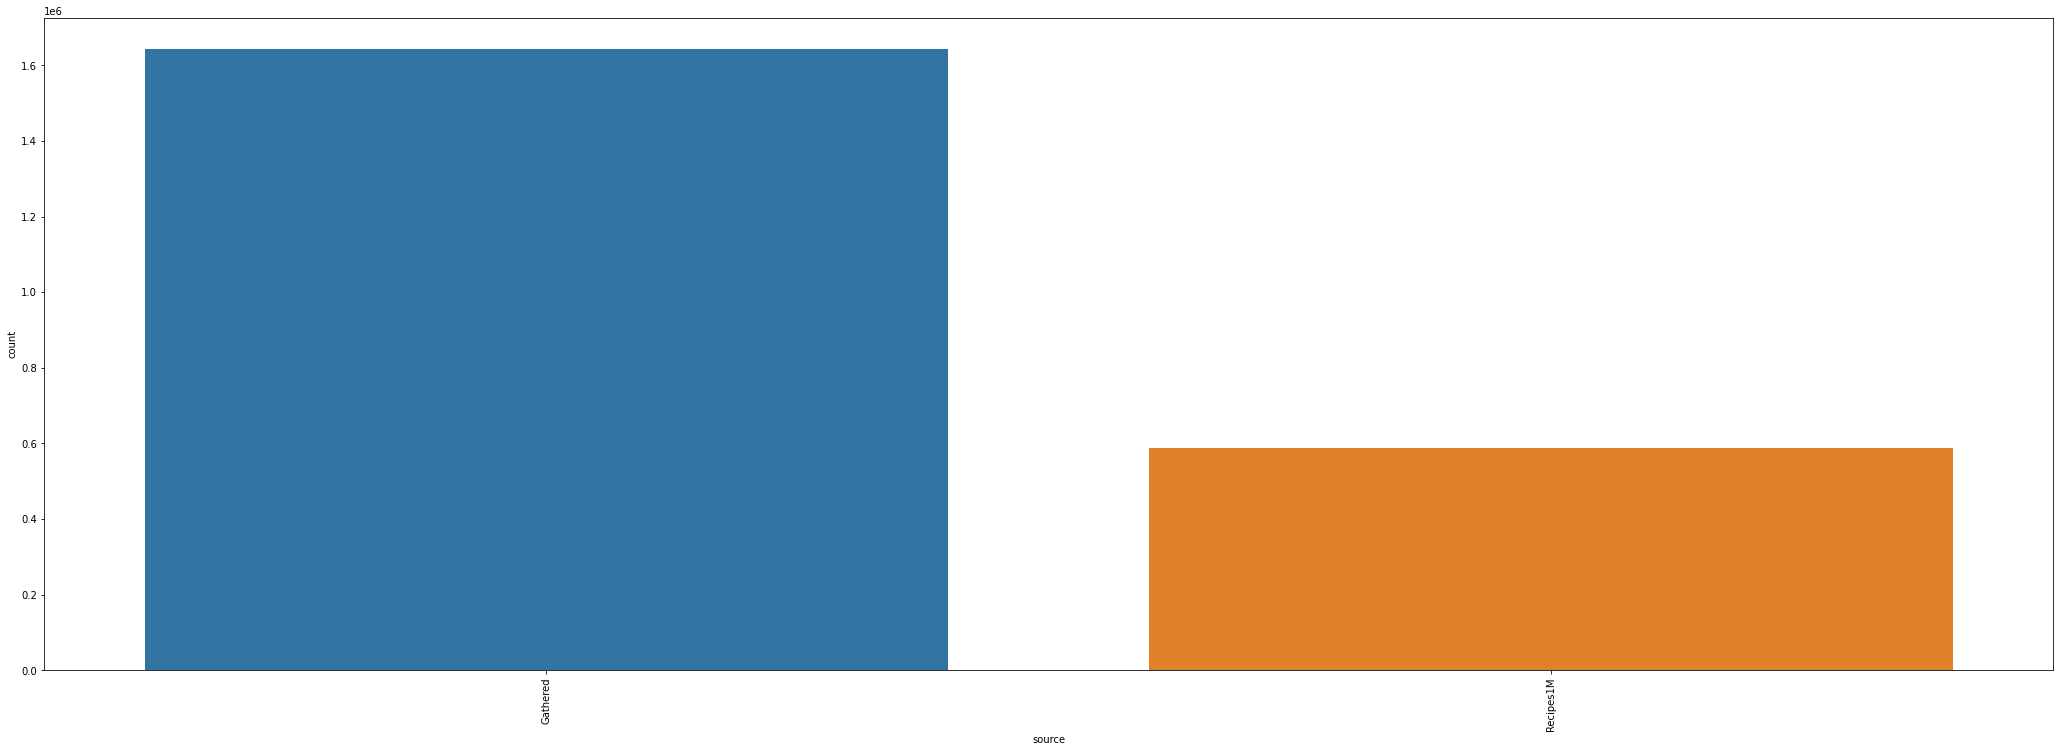

In [ ]:
y = df["source"]
plt.figure(figsize=(18*2, 12))
g = sns.countplot(y)
g.set(yscale="linear")
plt.xticks(rotation=90)
plt.show()

**Summary**

The dataset contains 7 columns:

*   Id
*   title
*   ingredients
*   directions
*   link
*   source
*   NER

*Title* is a short string that is scraped from the recipe website. There are 1312871 unique titles out of 2231142, this is because different recipes sometimes have the same title, not that there are duplicates in the dataset.

*Ingredients* are in the form of json list that contains 8.7 elements on average. The shortest list contains 1 element and the longest 407! There several rows that contain the same list of elements but they belong to different recipes.

*Directions* are in the form of json list that contains 6.6 elements on average. The shortest list contains 1 element and the longest 164. There several rows that contain the same list of elements but they belong to different recipes.

There are multiple rows that have same *title* and ingredient or *title* and directions which indicate that there several recipes are simmilar.

*Link* column contains the webpage from which particular recipe was scraped.

*NER* column contains identified food entities belonging to the particular recipe based on the ingredients column


*Source* column indicates whether the recipe was gathered from the webpage or taken from the Recipes1M dataset. We can see that more than 1.6 recipes were gather from the web and about 600k were taken from the Recipes1M dataset
